In [1]:
import fastbook
fastbook.setup_book()

In [2]:
import fastai
from fastai.vision.widgets import *

In [3]:
from fastbook import *

In [4]:
path = Path("data_original")

In [5]:
files = get_image_files(path)

In [6]:
corrupt = verify_images(files)

In [7]:
mezcal = DataBlock(
            blocks=(ImageBlock, CategoryBlock),
            get_items=get_image_files,
            splitter=RandomSplitter(valid_pct=0.2, seed=666),
            get_y=parent_label,
            item_tfms=Resize(128)
)

In [8]:
dls = mezcal.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


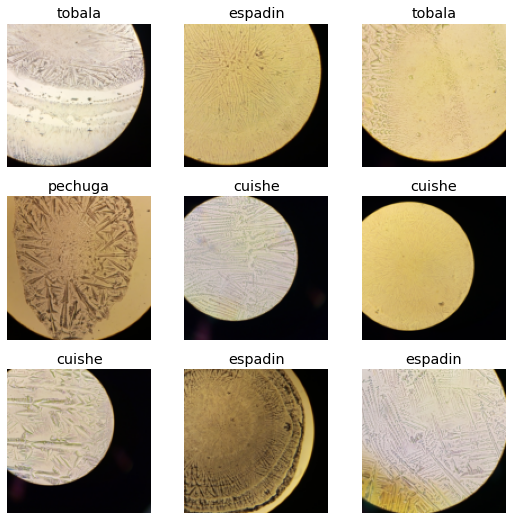

In [9]:
dls.valid.show_batch()

In [10]:
dls.train.show_batch()

ValueError: This DataLoader does not contain any batches

In [ ]:
mezcal = mezcal.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = mezcal.dataloaders("data_original")
dls.train.show_batch(max_n=4, nrows=1, unique=True)